In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import surprise

In [55]:
os.chdir("E:\Python for MLAI\JIGSAW\Projects\Project-7 Recommendation Engines")

###### lets Import the data files into the jupyter notebook

In [56]:
books=pd.read_csv("BX-Books.csv",sep=';',error_bad_lines=False,warn_bad_lines=False,encoding='latin-1')
users=pd.read_csv("BX-Users.csv",sep=';',error_bad_lines=False,encoding='latin-1')
rating=pd.read_csv("BX-Book-Ratings.csv",sep=';',error_bad_lines=False,encoding='latin-1')

In [57]:
#now look at the columns that our data has.
print(books.columns)
print(users.columns)
print(rating.columns)

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
Index(['User-ID', 'Location', 'Age'], dtype='object')
Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


In [58]:
#look at the shape of the dataset.
print(books.shape)
print(users.shape)
print(rating.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


###### Lets Explore the file wise data, firstly we will go through the book data, will clean and apply manupulations to it.

In [59]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [60]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [61]:
#as the url columns is not of our use then it will be good to drop these columns.
books=books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1)

In [62]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [18]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
dtype: object

In [19]:
pd.set_option("display.max_colwidth",-1)

In [20]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

###### as we can see in our years of publications column we have the two unwanted values i.e; DK Publishing Inc and Gallimard, these entries are falsily taken and need to treat accordingly

In [63]:
books.loc[(books['Year-Of-Publication']=='DK Publishing Inc')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [64]:
books.loc[books.ISBN=='0789466953','Year-Of-Publication']=2000
books.loc[books.ISBN=='0789466953','Book-Author']='James Buckley'
books.loc[books.ISBN=='0789466953','Book-Title']='DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.loc[books.ISBN=='0789466953','Publisher']='DK Publishing Inc'

In [65]:
books.loc[books.ISBN=='078946697X','Year-Of-Publication']=2000
books.loc[books.ISBN=='078946697X','Book-Author']='Michael Teitelbaum'
books.loc[books.ISBN=='078946697X','Book-Title']='DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.loc[books.ISBN=='078946697X','Publisher']='DK Publishing Inc'

In [66]:
books.loc[(books['Year-Of-Publication']=='Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [67]:
books.loc[books.ISBN=='2070426769','Year-Of-Publication']=2003
books.loc[books.ISBN=='2070426769','Book-Author']='Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[books.ISBN=='2070426769','Book-Title']="Peuple du ciel, suivi de 'Les Bergers'"
books.loc[books.ISBN=='078946697X','Publisher']='Gallimard'

In [68]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [69]:
books['Year-Of-Publication'].dtypes

dtype('O')

###### As the years are in the object format, we need to change these values in the numeric format. While converting our data to numeric form we are passing errors='coerce' which means the invalid parsing will be set as NaN

In [70]:
books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'],errors='coerce')

In [71]:
print(sorted(books['Year-Of-Publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [72]:
books['Year-Of-Publication'].dtypes

dtype('int64')

###### Here i am working with this data in year 2019 so years after, i will consider them as invalid and also year 0 doesn't make any sense, so we will drop the year 0 and year after the 2019 in my data, firstly i will convert these values into null value by the method np.NAN then i will replace these null values with the mean

In [73]:
books.loc[(books['Year-Of-Publication']==0)|(books['Year-Of-Publication']>2019),'Year-Of-Publication']=np.NAN
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].mean()),inplace=True)

In [75]:
books['Year-Of-Publication'].dtypes

dtype('float64')

In [77]:
books['Year-Of-Publication']=books['Year-Of-Publication'].astype(np.int32)

In [78]:
print(sorted(books['Year-Of-Publication'].unique()))

[1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012]


In [79]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [80]:
books.loc[books['Publisher'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [81]:
books.loc[(books.ISBN=='193169656X'),'Publisher']='other'
books.loc[(books.ISBN=='1931696993'),'Publisher']='other'

In [82]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher'],
      dtype='object')

In [83]:
books.loc[books['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing


""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

#### Now Lets Explore User Data Set

In [84]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [85]:
users.isnull().sum()

User-ID     0     
Location    0     
Age         110762
dtype: int64

In [86]:
users.shape

(278858, 3)

In [87]:
users.dtypes

User-ID     int64  
Location    object 
Age         float64
dtype: object

In [88]:
users['User-ID'].unique()

array([     1,      2,      3, ..., 278856, 278857, 278858], dtype=int64)

In [89]:
print(sorted(users['Age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

###### As we know the age below 5 years and above 90 doesn't make any sense, so firstly we will try to convert these values will null value and then will impute with the mean age 

In [90]:
users.loc[(users['Age']<5)|(users['Age']>90),'Age']=np.nan
users['Age']=users['Age'].fillna(users['Age'].mean())
users['Age']=users['Age'].astype(np.int32)

In [91]:
print(sorted(users['Age'].unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


#### now let explore rating data set

In [92]:
rating.shape

(1149780, 3)

In [93]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [94]:
rating.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [95]:
rating.dtypes

User-ID        int64 
ISBN           object
Book-Rating    int64 
dtype: object

In [96]:
rating['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [97]:
n_users=users.shape[0]
n_books=books.shape[0]
print(n_users*n_books)

75670906880


In [98]:
rating.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [99]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher'],
      dtype='object')

###### now we will try to find out the books which were being rated and then will try to extract the ID's for those books

In [100]:
ratings_new=rating[rating.ISBN.isin(books.ISBN)]
ratings_new=ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]

In [101]:
print(rating.shape)
print(ratings_new.shape)

(1149780, 3)
(1031136, 3)


In [102]:
sparsity=1.0-len(ratings_new)/float(n_users*n_books)
print("the sparsity level of book crossing data set is "+str(sparsity*100)+ " %")

the sparsity level of book crossing data set is 99.99863734155898 %


In [103]:
rating['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [104]:
ratings_explicit=ratings_new[ratings_new['Book-Rating']!=0]
ratings_implicit=ratings_new[ratings_new['Book-Rating']==0]

In [106]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34


In [107]:
users_exp_ratings=users[users['User-ID'].isin(ratings_explicit['User-ID'])]
users_imp_ratings=users[users['User-ID'].isin(ratings_implicit['User-ID'])]                                              

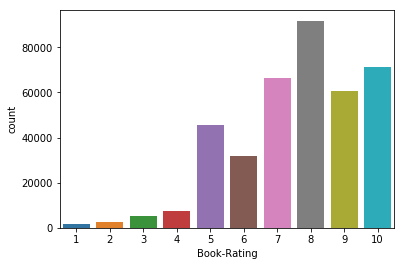

In [108]:
sns.countplot(data=ratings_explicit,x='Book-Rating');

#### Now we are in the position of make recommendation
1- $Popularity$- $based$- $Recommendation$

In [109]:
ratings_count=pd.DataFrame(ratings_explicit.groupby(['ISBN'])['Book-Rating'].sum())
top10=ratings_count.sort_values('Book-Rating',ascending=False).head(10)
print("following books are recommended")
top10.merge(books,left_index=True,right_on='ISBN')

following books are recommended


,Book-Rating,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,1999,Arthur A. Levine Books
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
26,2551,0971880107,Wild Animus,Rich Shapero,2004,Too Far
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),Billie Letts,1998,Warner Books
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books
118,2179,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star


#### Method 2
2- $User$-$Based$
###### as our machine does not have enough ram to apply algorithms to whole data, so we will try to apply our algorithms on test data.

In [209]:
data=ratings_explicit.sample(frac=0.15,random_state=100)

In [210]:
data.shape

(57576, 3)

In [211]:
data.head()

,User-ID,ISBN,Book-Rating
584624,141073,0373833598,6
907814,220586,006000438X,8
91387,20265,0345323750,8
60294,12153,0688013929,9
815161,198507,0375502025,7


In [212]:
data.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [213]:
data=data.rename(columns={'User-ID':'user',"ISBN":'item',"Book-Rating":'rating'})

In [214]:
data.head()

,user,item,rating
584624,141073,0373833598,6
907814,220586,006000438X,8
91387,20265,0345323750,8
60294,12153,0688013929,9
815161,198507,0375502025,7


In [215]:
reader=surprise.dataset.Reader(line_format='user item rating',rating_scale=(1,10))

In [216]:
data1=surprise.dataset.Dataset.load_from_df(data,reader=reader)

In [217]:
data1.raw_ratings

[(141073, '0373833598', 6.0, None),
 (220586, '006000438X', 8.0, None),
 (20265, '0345323750', 8.0, None),
 (12153, '0688013929', 9.0, None),
 (198507, '0375502025', 7.0, None),
 (20106, '0446610542', 8.0, None),
 (241802, '0590477382', 5.0, None),
 (252385, '0192816705', 7.0, None),
 (235736, '0373825021', 8.0, None),
 (240402, '0385334710', 10.0, None),
 (13279, '0060158638', 9.0, None),
 (37311, '044661162X', 5.0, None),
 (72771, '3596126436', 9.0, None),
 (163759, '0373708807', 5.0, None),
 (90232, '2070403688', 5.0, None),
 (1923, '0330357190', 8.0, None),
 (250326, '0441810764', 9.0, None),
 (20060, '0440224764', 9.0, None),
 (199092, '0440234743', 3.0, None),
 (58790, '0887307876', 9.0, None),
 (115435, '0671755064', 8.0, None),
 (192479, '0515135739', 10.0, None),
 (266283, '0440226430', 7.0, None),
 (55620, '0060652934', 8.0, None),
 (68984, '1578561256', 8.0, None),
 (276055, '1578151023', 8.0, None),
 (218059, '0895941228', 5.0, None),
 (236604, '3892061238', 8.0, None),
 (2

In [218]:
data1_train=data1.build_full_trainset()

In [219]:
import surprise.prediction_algorithms.knns as knns
knnbasic=knns.KNNWithMeans(k=40,min_k=1,sim_options={'name':'cosine','user_based':True})

In [220]:
knnbasic.train(data1_train)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [221]:
data.head()

,user,item,rating
584624,141073,0373833598,6
907814,220586,006000438X,8
91387,20265,0345323750,8
60294,12153,0688013929,9
815161,198507,0375502025,7


In [222]:
data['item'].dtypes

dtype('O')

In [223]:
knnbasic.predict(uid=20265,iid='0345323750')

Prediction(uid=20265, iid='0345323750', r_ui=None, est=8.85909090909091, details={'actual_k': 3, 'was_impossible': False})

In [224]:
data1.split(n_folds=3)
surprise.evaluate(knnbasic,data1)

Evaluating RMSE, MAE of algorithm KNNWithMeans.

------------
Fold 1
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.8572
MAE:  1.4720
------------
Fold 2
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.8363
MAE:  1.4520
------------
Fold 3
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.8640
MAE:  1.4773
------------
------------
Mean RMSE: 1.8525
Mean MAE : 1.4671
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'rmse': [1.8572423095064823,
                             1.836326067673651,
                             1.863984436322746],
                            'mae': [1.4720066362603759,
                             1.4520041531506958,
                             1.4772778761014482]})

###### Now its time to apply gridsearch for the best parameters

In [225]:
param_grid={'k':[10,20,30,40,50],'sim_options':{'name':['msd','cosine'],'user_based':[True]}}

In [226]:
algo=knns.KNNWithMeans

In [227]:
grid_search=surprise.GridSearch(algo,param_grid=param_grid,measures=['RMSE','MAE'])

In [228]:
grid_search.evaluate(data1)

Running grid search for the following parameter combinations:
{'k': 10, 'sim_options': {'name': 'msd', 'user_based': True}}
{'k': 10, 'sim_options': {'name': 'cosine', 'user_based': True}}
{'k': 20, 'sim_options': {'name': 'msd', 'user_based': True}}
{'k': 20, 'sim_options': {'name': 'cosine', 'user_based': True}}
{'k': 30, 'sim_options': {'name': 'msd', 'user_based': True}}
{'k': 30, 'sim_options': {'name': 'cosine', 'user_based': True}}
{'k': 40, 'sim_options': {'name': 'msd', 'user_based': True}}
{'k': 40, 'sim_options': {'name': 'cosine', 'user_based': True}}
{'k': 50, 'sim_options': {'name': 'msd', 'user_based': True}}
{'k': 50, 'sim_options': {'name': 'cosine', 'user_based': True}}
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computin

In [229]:
print(grid_search.best_params['RMSE'])
print(grid_search.best_params['MAE'])

{'k': 10, 'sim_options': {'name': 'cosine', 'user_based': True}}
{'k': 10, 'sim_options': {'name': 'cosine', 'user_based': True}}


In [230]:
print(grid_search.best_score['RMSE'])
print(grid_search.best_score['MAE'])

1.85251760450096
1.4670962218375065


In [231]:
data.head()

,user,item,rating
584624,141073,0373833598,6
907814,220586,006000438X,8
91387,20265,0345323750,8
60294,12153,0688013929,9
815161,198507,0375502025,7


In [232]:
data1_train.to_inner_uid(141073)

0

In [233]:
knnbasic.get_neighbors(data1_train.to_inner_uid(141073),10)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [234]:
for i in [12, 887, 1317, 1326, 1563, 1626, 1899, 1919, 2211, 2772]:
    print(data1_train.to_raw_uid(i))

72771
239584
83637
50526
243991
207291
224764
136071
49144
17507


In [235]:
data1_train.to_inner_iid('006000438X')

1

In [236]:
knnbasic.get_neighbors(data1_train.to_inner_iid('006000438X'),10)

[70, 13464, 0, 2, 3, 4, 5, 6, 7, 8]

In [237]:
for i in [0, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    print(data1_train.to_raw_iid(i))

0373833598
0345323750
0688013929
0375502025
0446610542
0590477382
0192816705
0373825021
0385334710
0060158638
